# Machine Learning Project for CS504
### Professor: Dr. Jessica Lin
### Student: Angel N. Sierra
### GMU

**Research Article Title:** Data driven prediction models of energy use of appliances in a low-energy house
**Researchers:** Luis M. Candanedo, Véronique Feldheim, Dominique Deramaix

#### Introduction
US agencies such as the Environmental Protection Agency (EPA) and the congress have demonstrated an interest to optimize energy consumption across the US through technology and incentives. 

From a technical perspective EPA is looking to recognize smart home energy management systems capable to optimize energy use of multiple devices. Energy Star  is EPA’s internet presence to share information, news and events. 

From an incentive perspective, the congress has provided tax credits for residential energy efficiency. One of the last incentive actions was captured by the Bipartisan Budget Act of 2018 in which the tax credits for energy efficiency that had expired in 2016 were renewed.

From an academia perspective, many research have being performed to understand appliance energy use. Of particular interest is the Data driven prediction models of energy use of appliances in low-energy house (Candanedo, Feldheim, & Deramaix, 2017) article presented in the Energy and Buildings journal.

This project intends to analyze the Appliances energy prediction Data Set (Candanedo L. , 2017) found in the UCI Machine Learning Repository to augment the prediction models benchmark provided by the research. WEKA and R will be used to prepare the data, run a new regression model not covered in the article, and establish a baseline between the results in the article and the results observed in the local machine.

#### General Data Analysis and Data Preparation
This section would provide the initial analysis and data preparation performed by the researchers with the end goal of ensuring a common baseline. Once baseline comparison is performed I would proceed to augment the research by adding a new machine learning algorithm and executing similar activities in WEKA to compare results.


In [1]:
energy_data <- read.csv("00 - Data Set/energydata_complete.csv")
str(energy_data)

'data.frame':	19735 obs. of  29 variables:
 $ date       : Factor w/ 19735 levels "2016-01-11 17:00:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Appliances : int  60 60 50 50 60 50 60 60 60 70 ...
 $ lights     : int  30 30 30 40 40 40 50 50 40 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1       : num  47.6 46.7 46.3 46.1 46.3 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.6 44.6 44.5 ...
 $ T3         : num  19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3       : num  44.7 44.8 44.9 45 45 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.9 45.7 45.5 ...
 $ T5         : num  17.2 17.2 17.2 17.2 17.2 ...
 $ RH_5       : num  55.2 55.2 55.1 55.1 55.1 ...
 $ T6         : num  7.03 6.83 6.56 6.43 6.37 ...
 $ RH_6       : num  84.3 84.1 83.2 83.4 84.9 ...
 $ T7         : num  17.2 17.2 17.2 17.1 17.2 ...
 $ RH_7       : num  41.6 41.6 41.4 41.3 41.2 ...
 $ T8         : num  18.2 18.2 18.2 18.1 18.1 18.1 18.1 18.1 18.1 1

**Observation:**
The date feature is the only feature with an inadequate data type and we need to make sure this feature is considered as a date format to generate the necessary features.

In [5]:
#show date data type with inapropriate data type
str(energy_data$date)

#fix date data type
energy_data$date <- strptime(as.character(energy_data$date),format="%Y-%m-%d %H:%M:%S")
energy_data$date <- as.POSIXct(energy_data$date,tz="UTC")

#validate data type for date
class(energy_data$date)

#validate data set shows proper data type
str(energy_data$date)

 POSIXct[1:19735], format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" "2016-01-11 17:20:00" ...


[1] "POSIXct" "POSIXt"

 POSIXct[1:19735], format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" "2016-01-11 17:20:00" ...


**Observation:**
The first features created by the researchers were *number of seconds since midnight (NSM)*, *week status*, and *day of the week*. These new features would allow us to categorize instances in a finite time set; a common approach for time series.

Prior to include these new values to the data set the researcher needed to create a function to calculate NSM and Week Status.

In [30]:
#include necessary libraries
suppressWarnings(library(lubridate))

# New Functions
second_day <- function(x){
    #x is an object in posixct format
    s <- hour(x)*3600+minute(x)*60+second(x)
}

weekend_weekday <- function(x) {
    val <- weekdays(x)
    if(val == "Saturday" | val == "Sunday"){
        val2 = "Weekend"
    }
    else {
        val2 = "Weekday"
    }
    return(val2)
}

In [9]:
#Adding new features to data set
energy_data$NSM <- second_day(energy_data$date)
energy_data$WeekStatus <- unlist(lapply(energy_data$date, weekend_weekday))
energy_data$Day_of_week <- weekdays(energy_data$date)

#Validate that week status and day of the week features only contains the appropriate values
unique(energy_data$WeekStatus)
unique(energy_data$Day_of_week)
unique(energy_data$NSM)

[1] "Weekday" "Weekend"

[1] "Monday"    "Tuesday"   "Wednesday" "Thursday"  "Friday"    "Saturday" 
[7] "Sunday"

[1] 61200 61800 62400 63000 63600 64200 64800 65400 66000 66600 67200 67800
 [13] 68400 69000 69600 70200 70800 71400 72000 72600 73200 73800 74400 75000
 [25] 75600 76200 76800 77400 78000 78600 79200 79800 80400 81000 81600 82200
 [37] 82800 83400 84000 84600 85200 85800     0   600  1200  1800  2400  3000
 [49]  3600  4200  4800  5400  6000  6600  7200  7800  8400  9000  9600 10200
 [61] 10800 11400 12000 12600 13200 13800 14400 15000 15600 16200 16800 17400
 [73] 18000 18600 19200 19800 20400 21000 21600 22200 22800 23400 24000 24600
 [85] 25200 25800 26400 27000 27600 28200 28800 29400 30000 30600 31200 31800
 [97] 32400 33000 33600 34200 34800 35400 36000 36600 37200 37800 38400 39000
[109] 39600 40200 40800 41400 42000 42600 43200 43800 44400 45000 45600 46200
[121] 46800 47400 48000 48600 49200 49800 50400 51000 51600 52200 52800 53400
[133] 54000 54600 55200 55800 56400 57000 57600 58200 58800 59400 60000 60600

In [14]:
#Validate that new features show the correct data type
str(energy_data$WeekStatus)
str(energy_data$Day_of_week)
str(energy_data$NSM)

#Change data type for Day_of_Week and WeekStatus from Chr to Factor
energy_data$Day_of_week <- as.factor(energy_data$Day_of_week)
energy_data$WeekStatus <- as.factor(energy_data$WeekStatus)

print("---------------")

#Validate that new features show the correct data type
str(energy_data$WeekStatus)
str(energy_data$Day_of_week)
str(energy_data$NSM)

 Factor w/ 2 levels "Weekday","Weekend": 1 1 1 1 1 1 1 1 1 1 ...
 Factor w/ 7 levels "Friday","Monday",..: 2 2 2 2 2 2 2 2 2 2 ...
 num [1:19735] 61200 61800 62400 63000 63600 64200 64800 65400 66000 66600 ...
[1] "---------------"
 Factor w/ 2 levels "Weekday","Weekend": 1 1 1 1 1 1 1 1 1 1 ...
 Factor w/ 7 levels "Friday","Monday",..: 2 2 2 2 2 2 2 2 2 2 ...
 num [1:19735] 61200 61800 62400 63000 63600 64200 64800 65400 66000 66600 ...


[1] "2016-01-11 17:00:00 UTC"

[1] "2016-01-18 16:50:00 UTC"

png 
  2

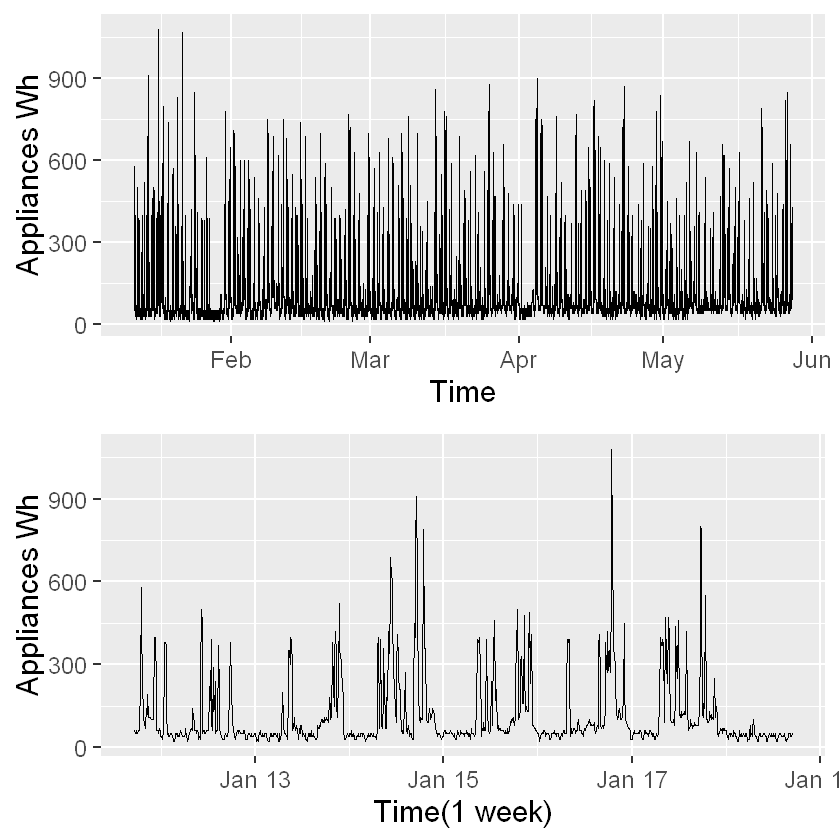

In [22]:
#Include appropriate libraries
library(gridExtra)

#Find intervals for 1 week worth of data
energy_data$date[1]
energy_data$date[1008]

#Create time series plot for appliance energy values
plot1 <- qplot(energy_data$date, 
               energy_data$Appliances,
               xlab='Time',
               ylab='Appliances Wh',
               geom="line")+theme_grey(base_size = 18)

plot2 <- qplot(energy_data$date[1:1008],
               energy_data$Appliances[1:1008],
               xlab='Time(1 week)',
               ylab='Appliances Wh',
               geom="line")+theme_grey(base_size = 18)

grid.arrange(plot1, plot2, nrow=2)

#Capture plots in an image
png('00-Appliances_Time_Series_Profile.png',width = 14, height = 10, units = 'in', res = 300)
grid.arrange(plot1, plot2, nrow=2)
dev.off()

png 
  2

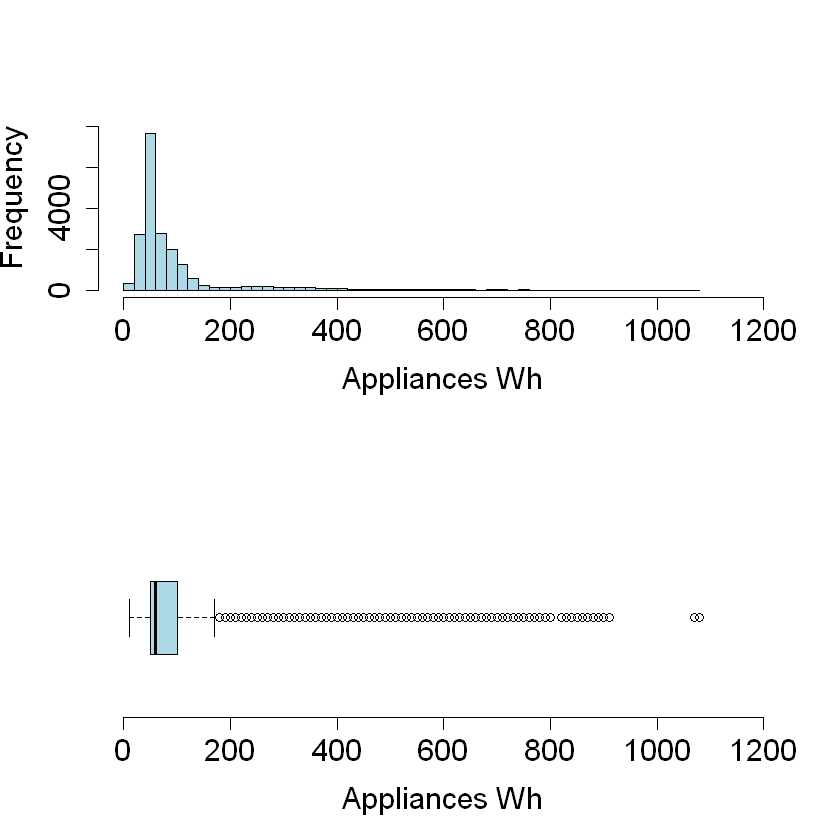

In [23]:
#Plot Histogram and box plot for appliance energy feature class
par(mfrow=c(2,1))
hist(energy_data$Appliances,main="",xlab="Appliances Wh", breaks=40,
     col='lightblue',xlim=c(0,1200),ylim=c(0,9000),cex.lab=1.5,cex.axis=1.5,cex.main=1.5,cex.sub=1.5)
boxplot(energy_data$Appliances,
        boxfill='lightblue',horizontal=TRUE,ylim=c(0,1200),xlab="Appliances Wh",frame=F,
        cex.lab=1.5,cex.axis=1.5,cex.main=1.5,cex.sub=1.5)


png('01-Appliances_Histogram_and_Boxplot.png',width = 14, height = 10, units = 'in', res = 300)
par(mfrow=c(2,1))
hist(energy_data$Appliances,main="",xlab="Appliances Wh", breaks=40,
     col='lightblue',xlim=c(0,1200),ylim=c(0,9000),cex.lab=1.5,cex.axis=1.5,cex.main=1.5,cex.sub=1.5)
boxplot(energy_data$Appliances,
        boxfill='lightblue',horizontal=TRUE,ylim=c(0,1200),xlab="Appliances Wh",frame=F,
        cex.lab=1.5,cex.axis=1.5,cex.main=1.5,cex.sub=1.5)
dev.off()

In [26]:
#Create data set for heat map
heat_map_data <- energy_data

#Add necessary features for the heat map
heat_map_data$my <- floor_date(heat_map_data$date,"month")
heat_map_data$mhr <- floor_date(heat_map_data$date,"hour")

#Validate new features creation
str(heat_map_data$my)
str(heat_map_data$mhr)

 POSIXct[1:19735], format: "2016-01-01" "2016-01-01" "2016-01-01" "2016-01-01" "2016-01-01" ...
 POSIXct[1:19735], format: "2016-01-11 17:00:00" "2016-01-11 17:00:00" "2016-01-11 17:00:00" ...


In [39]:
#Create heat map data summary per hour
#Include appropriate libraries
suppressWarnings(library(plyr))

HM_data_hour <- ddply(heat_map_data, "mhr", summarise, Appliances=sum(Appliances))

#Add day of week feature
HM_data_hour$Day_week <- wday(HM_data_hour$mhr, label=TRUE)

#Add week number feature
HM_data_hour$week_year <- week(HM_data_hour$mhr)

#Add hour feature
HM_data_hour$Hour <- hour(HM_data_hour$mhr)

#Show final data frame
head(HM_data_hour,5)

mhr,Appliances,Day_week,week_year,Hour
2016-01-11 17:00:00,330,Mon,2,17
2016-01-11 18:00:00,1060,Mon,2,18
2016-01-11 19:00:00,1040,Mon,2,19
2016-01-11 20:00:00,750,Mon,2,20
2016-01-11 21:00:00,620,Mon,2,21


In [40]:
#Ensure na values are removed
HM_data_hour <- na.omit(HM_data_hour)

#Show data frame summary
summary(HM_data_hour)

      mhr                        Appliances   Day_week    week_year    
 Min.   :2016-01-11 17:00:00   Min.   : 170   Sun:456   Min.   : 2.00  
 1st Qu.:2016-02-14 23:15:00   1st Qu.: 300   Mon:463   1st Qu.: 7.00  
 Median :2016-03-20 05:30:00   Median : 380   Tue:480   Median :12.00  
 Mean   :2016-03-20 05:30:00   Mean   : 586   Wed:480   Mean   :11.82  
 3rd Qu.:2016-04-23 11:45:00   3rd Qu.: 660   Thu:480   3rd Qu.:17.00  
 Max.   :2016-05-27 18:00:00   Max.   :3650   Fri:475   Max.   :22.00  
                                              Sat:456                  
      Hour      
 Min.   : 0.00  
 1st Qu.: 6.00  
 Median :12.00  
 Mean   :11.50  
 3rd Qu.:17.75  
 Max.   :23.00  
                

In [51]:
#Separate data frame on a weekly basis
HM_data_hour_w1 <- HM_data_hour[HM_data_hour$week_year==3,]
HM_data_hour_w2 <- HM_data_hour[HM_data_hour$week_year==4,]
HM_data_hour_w3 <- HM_data_hour[HM_data_hour$week_year==5,]
HM_data_hour_w4 <- HM_data_hour[HM_data_hour$week_year==6,]

#Validate min and max value for each data frame
cat("Min Appliance Value for W1 is", min(HM_data_hour_w1$Appliances),"\n")
cat("Max Appliance Value for W1 is", max(HM_data_hour_w1$Appliances),"\n\n")
cat("")
cat("Min Appliance Value for W2 is", min(HM_data_hour_w2$Appliances),"\n")
cat("Max Appliance Value for W2 is", max(HM_data_hour_w2$Appliances),"\n\n")

cat("Min Appliance Value for W3 is", min(HM_data_hour_w3$Appliances),"\n")
cat("Max Appliance Value for W3 is", max(HM_data_hour_w3$Appliances),"\n\n")

cat("Min Appliance Value for W4 is", min(HM_data_hour_w4$Appliances),"\n")
cat("Max Appliance Value for W4 is", max(HM_data_hour_w4$Appliances),"\n\n")

Min Appliance Value for W1 is 190 
Max Appliance Value for W1 is 3350 

Min Appliance Value for W2 is 170 
Max Appliance Value for W2 is 3650 

Min Appliance Value for W3 is 170 
Max Appliance Value for W3 is 3420 

Min Appliance Value for W4 is 180 
Max Appliance Value for W4 is 2740 



png 
  2

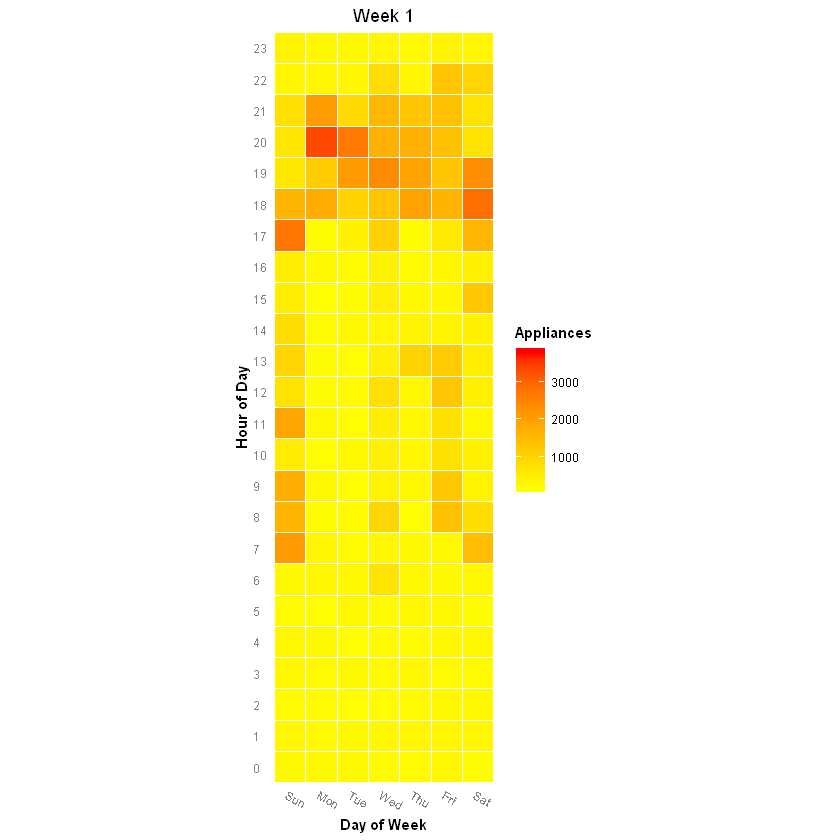

In [113]:
#Plot heat maps

#include proper library
suppressWarnings(library(ggplot2))

#Generate Heat Map Plot for week 1
gg1 <- ggplot(HM_data_hour_w1, aes(x=Day_week, y=Hour, fill=Appliances)) +
       geom_tile(aes(fill=Appliances), colour="white", size = 0.50) +
       scale_fill_gradient(low="yellow", high="red", limit=c(150, 3800)) +
       theme_grey(base_size = 9) +
       labs(x="Day of Week", y="Hour of Day") +
       ggtitle("Week 1") +
       scale_x_discrete(expand = c(0,0)) +
       scale_y_continuous(expand = c(0,0), breaks = seq(0,23,1)) +
       coord_equal() +
       theme(axis.ticks = element_blank(),
             plot.title=element_text(hjust=0.5),
             axis.title=element_text(face="bold"),
             legend.title=element_text(face="bold"),
             axis.text.y = element_text(size = 9 * 0.8,
                                        angle = 0,
                                        hjust = 0,
                                        colour="grey50"),
             axis.text.x = element_text(size = 9 * 0.8,
                                        angle = 330,
                                        hjust = 0,
                                        colour="grey50"))
gg1

png('02-01-Week_1_Heat_Map.png',width = 14, height = 10, units = 'in', res = 300)
gg1
dev.off()


png 
  2

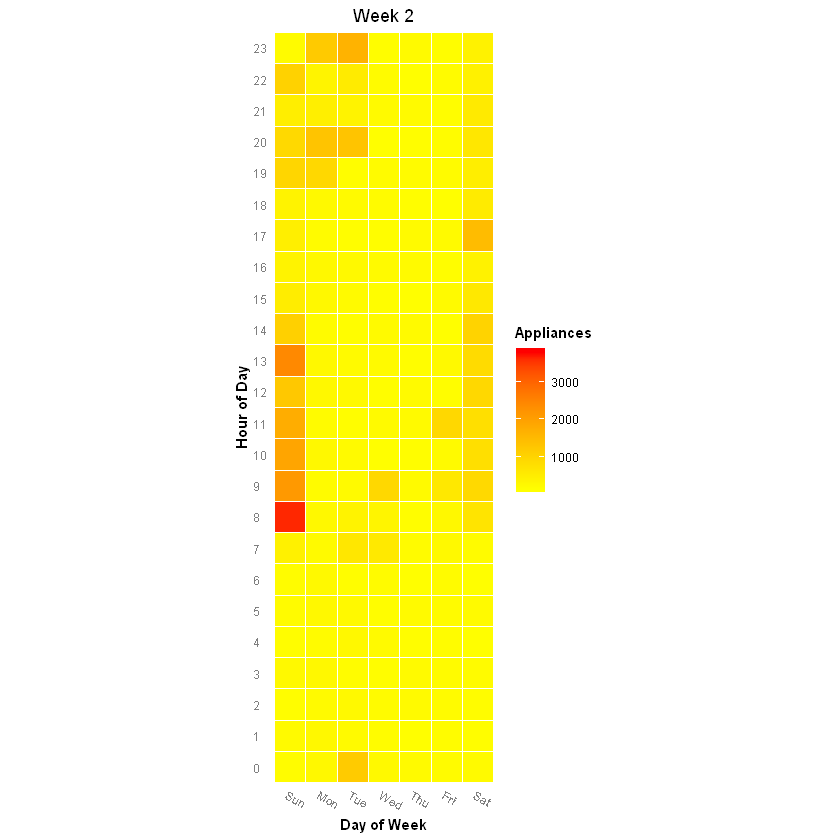

In [115]:
#Generate Heat Map Plot for week 2
gg2 <- ggplot(HM_data_hour_w2, aes(x=Day_week, y=Hour, fill=Appliances)) +
       geom_tile(aes(fill=Appliances), colour="white", size = 0.50) +
       scale_fill_gradient(low="yellow", high="red", limit=c(150, 3800)) +
       theme_grey(base_size = 9) +
       labs(x="Day of Week", y="Hour of Day") +
       ggtitle("Week 2") +
       scale_x_discrete(expand = c(0,0)) +
       scale_y_continuous(expand = c(0,0), breaks = seq(0,23,1)) +
       coord_equal() +
       theme(axis.ticks = element_blank(),
             plot.title=element_text(hjust=0.5),
             axis.title=element_text(face="bold"),
             legend.title=element_text(face="bold"),
             axis.text.y = element_text(size = 9 * 0.8,
                                        angle = 0,
                                        hjust = 0,
                                        colour="grey50"),
             axis.text.x = element_text(size = 9 * 0.8,
                                        angle = 330,
                                        hjust = 0,
                                        colour="grey50"))
gg2

png('02-02-Week_2_Heat_Map.png',width = 14, height = 10, units = 'in', res = 300)
gg2
dev.off()

png 
  2

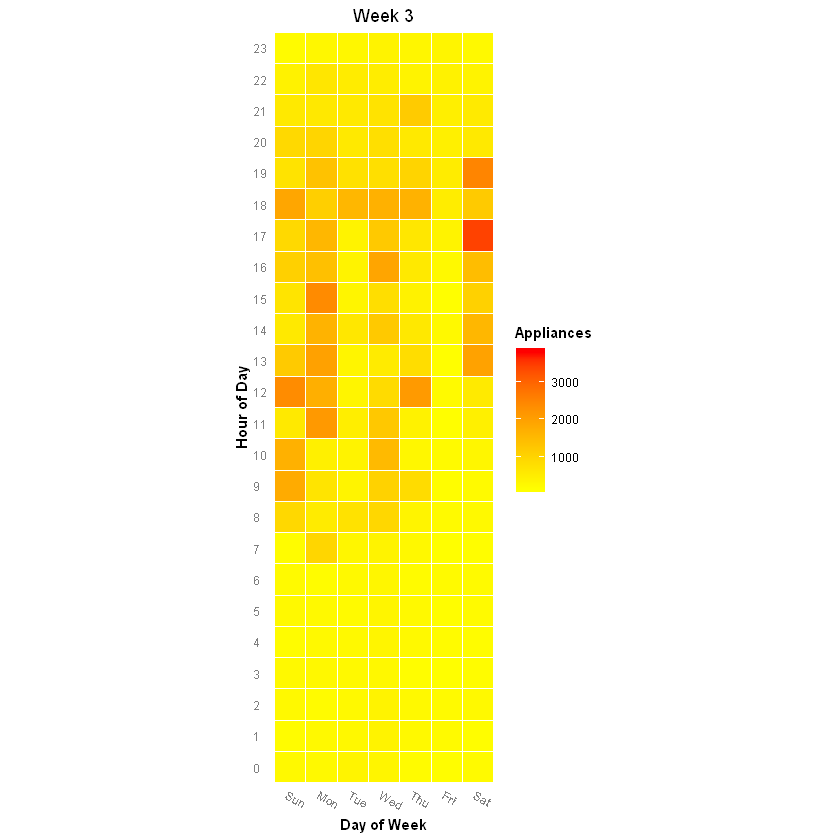

In [116]:
#Generate Heat Map Plot for week 3
gg3 <- ggplot(HM_data_hour_w3, aes(x=Day_week, y=Hour, fill=Appliances)) +
       geom_tile(aes(fill=Appliances), colour="white", size = 0.50) +
       scale_fill_gradient(low="yellow", high="red", limit=c(150, 3800)) +
       theme_grey(base_size = 9) +
       labs(x="Day of Week", y="Hour of Day") +
       ggtitle("Week 3") +
       scale_x_discrete(expand = c(0,0)) +
       scale_y_continuous(expand = c(0,0), breaks = seq(0,23,1)) +
       coord_equal() +
       theme(axis.ticks = element_blank(),
             plot.title=element_text(hjust=0.5),
             axis.title=element_text(face="bold"),
             legend.title=element_text(face="bold"),
             axis.text.y = element_text(size = 9 * 0.8,
                                        angle = 0,
                                        hjust = 0,
                                        colour="grey50"),
             axis.text.x = element_text(size = 9 * 0.8,
                                        angle = 330,
                                        hjust = 0,
                                        colour="grey50"))
gg3

png('02-03-Week_3_Heat_Map.png',width = 14, height = 10, units = 'in', res = 300)
gg3
dev.off()

png 
  2

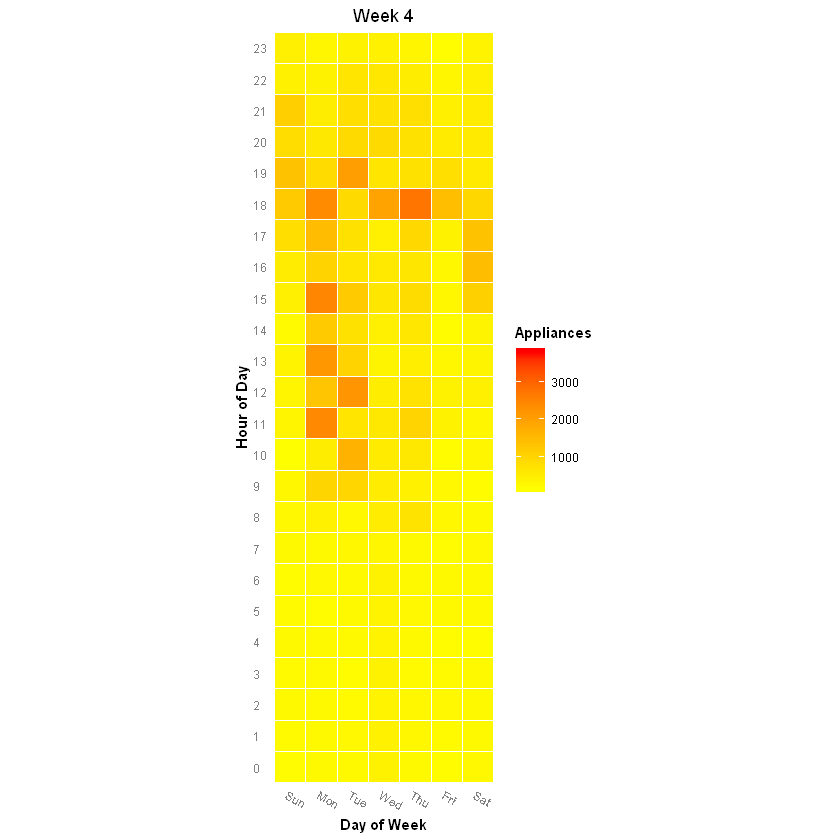

In [117]:
#Generate Heat Map Plot for week 4
gg4 <- ggplot(HM_data_hour_w4, aes(x=Day_week, y=Hour, fill=Appliances)) +
       geom_tile(aes(fill=Appliances), colour="white", size = 0.50) +
       scale_fill_gradient(low="yellow", high="red", limit=c(150, 3800)) +
       theme_grey(base_size = 9) +
       labs(x="Day of Week", y="Hour of Day") +
       ggtitle("Week 4") +
       scale_x_discrete(expand = c(0,0)) +
       scale_y_continuous(expand = c(0,0), breaks = seq(0,23,1)) +
       coord_equal() +
       theme(axis.ticks = element_blank(),
             plot.title=element_text(hjust=0.5),
             axis.title=element_text(face="bold"),
             legend.title=element_text(face="bold"),
             axis.text.y = element_text(size = 9 * 0.8,
                                        angle = 0,
                                        hjust = 0,
                                        colour="grey50"),
             axis.text.x = element_text(size = 9 * 0.8,
                                        angle = 330,
                                        hjust = 0,
                                        colour="grey50"))
gg4

png('02-04-Week_4_Heat_Map.png',width = 14, height = 10, units = 'in', res = 300)
gg4
dev.off()

In [124]:
#Provide proper libraries to create data set
suppressWarnings(library(caret))
suppressWarnings(library(lattice))

#Create Training Data Set
set.seed(1)
train_index <- createDataPartition(energy_data$Appliances, p=0.75, list=FALSE)

train_data <- energy_data[train_index,]

#Create Test Data Set
test_data <- energy_data[-train_index,]

# Validate data sets dimensions
cat("Original data set consist of",nrow(energy_data),"instances and",ncol(energy_data),"features\n")
cat("Training data set consist of",nrow(train_data),"instances and",ncol(train_data),"features\n")
cat("Testing data set consist of",nrow(test_data),"instances and",ncol(test_data),"features\n")

Original data set consist of 19735 instances and 32 features
Training data set consist of 14803 instances and 32 features
Testing data set consist of 4932 instances and 32 features


In [126]:
#Save all data sets with additional features and appropriate partitions
write.table(format(energy_data,digits=19),file="00 - Data Set/full_set.csv",sep=",",row.names=FALSE)
write.table(format(train_data, digits=19),file="00 - Data Set/training.csv",sep=",",row.names=FALSE)
write.table(format(test_data,digits=19),file="00 - Data Set/testing.csv",sep=",",row.names=FALSE)

In [156]:
#Add appropriate libraries to generate correlation Plots
suppressWarnings(library(Hmisc))
suppressWarnings(library(psych))

#Obtain Correlation for training set
train_corr_table_1 <- rcorr(as.matrix(train_data[,c(2:9)]))
train_corr_table_2 <- rcorr(as.matrix(train_data[,c(2,10:15)]))
train_corr_table_3 <- rcorr(as.matrix(train_data[,c(2,16:21)]))
train_corr_table_4 <- rcorr(as.matrix(train_data[,c(2,22:30)]))

#Obtain Pairs diagram for training set
png("03-01-Pairs_Plot_Train_Set.png",width=10,height=10,units="in",res=300)
pairs.panels(train_data[,c(2:9)],
             lm=TRUE,
             ellipses=FALSE,
             rug=FALSE,
             scale=FALSE,
             cex.cor=1.1,
             cex.labels=1.7,
             cex.axis=1.7)
dev.off()
train_corr_table_1

png 
  2

           Appliances lights    T1 RH_1    T2  RH_2    T3  RH_3
Appliances       1.00   0.19  0.06 0.09  0.12 -0.06  0.09  0.04
lights           0.19   1.00 -0.03 0.11 -0.01  0.06 -0.10  0.14
T1               0.06  -0.03  1.00 0.17  0.84  0.00  0.89 -0.03
RH_1             0.09   0.11  0.17 1.00  0.27  0.80  0.26  0.85
T2               0.12  -0.01  0.84 0.27  1.00 -0.16  0.74  0.12
RH_2            -0.06   0.06  0.00 0.80 -0.16  1.00  0.14  0.68
T3               0.09  -0.10  0.89 0.26  0.74  0.14  1.00 -0.01
RH_3             0.04   0.14 -0.03 0.85  0.12  0.68 -0.01  1.00

n= 14803 


P
           Appliances lights T1     RH_1   T2     RH_2   T3     RH_3  
Appliances            0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
lights     0.0000            0.0006 0.0000 0.1610 0.0000 0.0000 0.0000
T1         0.0000     0.0006        0.0000 0.0000 0.9443 0.0000 0.0014
RH_1       0.0000     0.0000 0.0000        0.0000 0.0000 0.0000 0.0000
T2         0.0000     0.1610 0.0000 0.0000        0.00

In [157]:
png("03-02-Pairs_Plot_Train_Set.png",width=10,height=10,units="in",res=300)
pairs.panels(train_data[,c(2,10:15)],
             lm=TRUE,
             ellipses=FALSE,
             rug=FALSE,
             scale=FALSE,
             cex.cor=1.1,
             cex.labels=1.7,
             cex.axis=1.7)
dev.off()
train_corr_table_2

png 
  2

           Appliances    T4  RH_4    T5  RH_5    T6  RH_6
Appliances       1.00  0.05  0.02  0.02  0.01  0.12 -0.09
T4               0.05  1.00 -0.05  0.87 -0.08  0.66 -0.70
RH_4             0.02 -0.05  1.00  0.09  0.35  0.26  0.39
T5               0.02  0.87  0.09  1.00  0.03  0.63 -0.63
RH_5             0.01 -0.08  0.35  0.03  1.00 -0.08  0.27
T6               0.12  0.66  0.26  0.63 -0.08  1.00 -0.67
RH_6            -0.09 -0.70  0.39 -0.63  0.27 -0.67  1.00

n= 14803 


P
           Appliances T4     RH_4   T5     RH_5   T6     RH_6  
Appliances            0.0000 0.0474 0.0056 0.4781 0.0000 0.0000
T4         0.0000            0.0000 0.0000 0.0000 0.0000 0.0000
RH_4       0.0474     0.0000        0.0000 0.0000 0.0000 0.0000
T5         0.0056     0.0000 0.0000        0.0000 0.0000 0.0000
RH_5       0.4781     0.0000 0.0000 0.0000        0.0000 0.0000
T6         0.0000     0.0000 0.0000 0.0000 0.0000        0.0000
RH_6       0.0000     0.0000 0.0000 0.0000 0.0000 0.0000       

In [158]:
png("03-03-Pairs_Plot_Train_Set.png",width=10,height=10,units="in",res=300)
pairs.panels(train_data[,c(2,16:21)],
             lm=TRUE,
             ellipses=FALSE,
             rug=FALSE,
             scale=FALSE,
             cex.cor=1.1,
             cex.labels=1.7,
             cex.axis=1.7)
dev.off()
train_corr_table_3

png 
  2

           Appliances    T7  RH_7    T8  RH_8    T9  RH_9
Appliances       1.00  0.03 -0.06  0.05 -0.09  0.02 -0.05
T7               0.03  1.00 -0.03  0.88 -0.21  0.94 -0.08
RH_7            -0.06 -0.03  1.00 -0.12  0.89  0.03  0.86
T8               0.05  0.88 -0.12  1.00 -0.21  0.87 -0.15
RH_8            -0.09 -0.21  0.89 -0.21  1.00 -0.11  0.86
T9               0.02  0.94  0.03  0.87 -0.11  1.00 -0.01
RH_9            -0.05 -0.08  0.86 -0.15  0.86 -0.01  1.00

n= 14803 


P
           Appliances T7     RH_7   T8     RH_8   T9     RH_9  
Appliances            0.0000 0.0000 0.0000 0.0000 0.0449 0.0000
T7         0.0000            0.0000 0.0000 0.0000 0.0000 0.0000
RH_7       0.0000     0.0000        0.0000 0.0000 0.0004 0.0000
T8         0.0000     0.0000 0.0000        0.0000 0.0000 0.0000
RH_8       0.0000     0.0000 0.0000 0.0000        0.0000 0.0000
T9         0.0449     0.0000 0.0004 0.0000 0.0000        0.3748
RH_9       0.0000     0.0000 0.0000 0.0000 0.0000 0.3748       

In [159]:
png("03-04-Pairs_Plot_Train_Set.png",width=10,height=10,units="in",res=300)
pairs.panels(train_data[,c(2,22:30)],
             lm=TRUE,
             ellipses=FALSE,
             rug=FALSE,
             scale=FALSE,
             cex.cor=1.1,
             cex.labels=1.7,
             cex.axis=1.7)
dev.off()
train_corr_table_4

png 
  2

            Appliances T_out Press_mm_hg RH_out Windspeed Visibility Tdewpoint
Appliances        1.00  0.10       -0.03  -0.15      0.09       0.00      0.02
T_out             0.10  1.00       -0.14  -0.57      0.19      -0.08      0.79
Press_mm_hg      -0.03 -0.14        1.00  -0.10     -0.23       0.04     -0.24
RH_out           -0.15 -0.57       -0.10   1.00     -0.17       0.09      0.04
Windspeed         0.09  0.19       -0.23  -0.17      1.00       0.00      0.13
Visibility        0.00 -0.08        0.04   0.09      0.00       1.00     -0.04
Tdewpoint         0.02  0.79       -0.24   0.04      0.13      -0.04      1.00
rv1              -0.01 -0.01        0.01   0.02     -0.01      -0.01      0.00
rv2              -0.01 -0.01        0.01   0.02     -0.01      -0.01      0.00
NSM               0.22  0.22        0.00  -0.34      0.10      -0.03      0.03
              rv1   rv2   NSM
Appliances  -0.01 -0.01  0.22
T_out       -0.01 -0.01  0.22
Press_mm_hg  0.01  0.01  0.00
RH_out     